In [41]:
##Import Libraries and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("All libraries imported successfully!")

All libraries imported successfully!


In [42]:
# Load datasets
print("="*60)
print("LOADING AND EXPLORING DATA")
print("="*60)

historical_data = pd.read_csv('historical_data.csv')
fear_greed = pd.read_csv('fear_greed_index.csv')

# Display basic information
print(f"Historical Data Shape: {historical_data.shape}")
print(f"Fear/Greed Data Shape: {fear_greed.shape}")

print("\nHistorical Data Columns:", historical_data.columns.tolist())
print("Fear/Greed Data Columns:", fear_greed.columns.tolist())

LOADING AND EXPLORING DATA
Historical Data Shape: (211224, 16)
Fear/Greed Data Shape: (2644, 4)

Historical Data Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Fear/Greed Data Columns: ['timestamp', 'value', 'classification', 'date']


In [43]:
# Check for missing values
print("Historical Data Missing Values:")
print(historical_data.isnull().sum())
print("\nFear/Greed Data Missing Values:")
print(fear_greed.isnull().sum())

# Display sample data
print("\nHistorical Data Sample:")
display(historical_data.head())
print("\nFear/Greed Data Sample:")
display(fear_greed.head())

Historical Data Missing Values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Fear/Greed Data Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Historical Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Fear/Greed Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [44]:
# Check unique values in key columns
if 'Coin' in historical_data.columns:
    print(f"Unique coins: {historical_data['Coin'].unique()}")
if 'Side' in historical_data.columns:
    print(f"Trade sides: {historical_data['Side'].unique()}")

# Display data types
print("\nHistorical Data Types:")
print(historical_data.dtypes)
print("\nFear/Greed Data Types:")
print(fear_greed.dtypes)

Unique coins: ['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC' 'ZRO'
 '@7' '@19' '@21' '@44' '@48' '@11' '@15' '@46' '@61' '@28' '@45' '@9'
 '@41' '@38' 'kSHIB' 'GRASS' 'TAO' 'AVAX' '@2' '@6' '@8' '@10' '@12' '@16'
 '@17' '@35' '@26' '@24' '@32' '@29' '@31' '@33' '@34' '@36' '@37' '@47'
 '@53' '@74' 'RUNE' 'CANTO' 'NTRN' 'BLUR' 'ZETA' 'MINA' 'MANTA' 'RNDR'
 'WLD' 'kBONK' 'ALT' 'INJ' 'STG' 'ZEN' 'MAVIA' 'PIXEL' 'ILV' 'FET' 'STRK'
 'CAKE' 'STX' 'ACE' 'PENDLE' 'AR' 'XAI' 'APE' 'MEME' 'NEAR' 'SEI' 'FTM'
 'MYRO' 'BIGTIME' 'IMX' 'BADGER' 'POLYX' 'OP' 'TNSR' 'MAV' 'TIA' 'MERL'
 'TON' 'PURR' 'ME' 'CRV' 'BRETT' 'CHILLGUY' 'MOODENG' 'VIRTUAL' 'COMP'
 'FARTCOIN' 'AI16Z' 'GRIFFAIN' 'ZEREBRO' 'SPX' 'MELANIA' 'PENGU' 'JELLY'
 'VVV' 'VINE' 'TST' 'ARK' 'YGG' 'POPCAT' 'NIL' 'MOVE' 'BABY' 'RENDER'
 'PROMPT' 'WCT' 'OGN' 'HYPER' 'ZORA' 'BIO' 'INIT' 

In [45]:
## Data Preprocessing
print("="*60)
print("PREPROCESSING DATA")
print("="*60)

# Convert timestamps
historical_data['Timestamp IST'] = pd.to_datetime(
    historical_data['Timestamp IST'], 
    format='%d-%m-%Y %H:%M'
)
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

# Extract dates for merging
historical_data['date'] = historical_data['Timestamp IST'].dt.date
fear_greed['date'] = fear_greed['date'].dt.date

print("Timestamp conversion completed!")

PREPROCESSING DATA
Timestamp conversion completed!


In [46]:
##Filter and Merge Data
# Filter for BTC trades only
historical_data = historical_data[historical_data['Coin'] == 'BTC']
print(f"After filtering for BTC: {len(historical_data)} trades")

# Merge datasets
merged_data = pd.merge(historical_data, fear_greed, on='date', how='left')
print(f"Merged dataset shape: {merged_data.shape}")
print(f"Rows with sentiment data: {merged_data['value'].notna().sum()}")

# Display merge summary
print(f"Data coverage: {merged_data['value'].notna().sum() / len(merged_data) * 100:.1f}% of trades have sentiment data")

After filtering for BTC: 26064 trades
Merged dataset shape: (26064, 20)
Rows with sentiment data: 26064
Data coverage: 100.0% of trades have sentiment data


In [47]:
##  Create Sentiment Categories
# Create sentiment categories
bins = [0, 25, 45, 75, 100]
labels = ['Extreme Fear', 'Fear', 'Greed', 'Extreme Greed']
merged_data['sentiment_category'] = pd.cut(
    merged_data['value'], 
    bins=bins, 
    labels=labels
)
merged_data = merged_data.dropna(subset=['sentiment_category'])
print(f"Final dataset shape after removing NaN sentiment: {merged_data.shape}")

# Display sentiment distribution
print("\nSentiment Category Distribution:")
sentiment_dist = merged_data['sentiment_category'].value_counts()
print(sentiment_dist)
print(f"\nPercentage Distribution:")
for category, count in sentiment_dist.items():
    print(f"{category}: {count/len(merged_data)*100:.1f}%")

Final dataset shape after removing NaN sentiment: (26064, 21)

Sentiment Category Distribution:
sentiment_category
Greed            11864
Fear             10020
Extreme Fear      2215
Extreme Greed     1965
Name: count, dtype: int64

Percentage Distribution:
Greed: 45.5%
Fear: 38.4%
Extreme Fear: 8.5%
Extreme Greed: 7.5%


In [48]:
## Calculate Basic Metrics
print("="*60)
print("CALCULATING BASIC METRICS")
print("="*60)

# Basic profitability metrics
merged_data['is_profitable'] = merged_data['Closed PnL'] > 0
merged_data['is_loss'] = merged_data['Closed PnL'] < 0

# Risk-adjusted metrics
merged_data['pnl_per_dollar'] = merged_data['Closed PnL'] / merged_data['Size USD']

# Time-based features
merged_data['hour'] = merged_data['Timestamp IST'].dt.hour
merged_data['day_of_week'] = merged_data['Timestamp IST'].dt.day_name()
merged_data['month'] = merged_data['Timestamp IST'].dt.month

print("Basic metrics calculated successfully!")

# Display sample of new columns
display(merged_data[['Closed PnL', 'is_profitable', 'pnl_per_dollar', 'hour', 'day_of_week']].head())

CALCULATING BASIC METRICS
Basic metrics calculated successfully!


,Closed PnL,is_profitable,pnl_per_dollar,hour,day_of_week
0,0.0,False,0.0,4,Monday
1,0.0,False,0.0,4,Monday
2,0.0,False,0.0,4,Monday
3,0.0,False,0.0,4,Monday
4,0.0,False,0.0,4,Monday


In [49]:
## Calculate Daily Statistics
# Calculate daily statistics
daily_stats = merged_data.groupby(['date', 'sentiment_category']).agg({
    'Closed PnL': ['sum', 'mean', 'median', 'std', 'count'],
    'Size USD': ['mean', 'sum'],
    'is_profitable': 'mean',
    'pnl_per_dollar': 'mean'
}).reset_index()

# Flatten column names
daily_stats.columns = ['_'.join(col).strip('_') for col in daily_stats.columns]

print("Daily statistics calculated successfully!")
print(f"Daily stats shape: {daily_stats.shape}")
display(daily_stats.head())

Daily statistics calculated successfully!
Daily stats shape: (1144, 11)


,date,sentiment_category,Closed PnL_sum,Closed PnL_mean,Closed PnL_median,Closed PnL_std,Closed PnL_count,Size USD_mean,Size USD_sum,is_profitable_mean,pnl_per_dollar_mean
0,2023-12-05,Extreme Fear,0.0,NaN,NaN,NaN,0,NaN,0.00,NaN,NaN
1,2023-12-05,Fear,0.0,NaN,NaN,NaN,0,NaN,0.00,NaN,NaN
2,2023-12-05,Greed,0.0,0.0,0.0,0.0,2,12499.31,24998.62,0.0,0.0
3,2023-12-05,Extreme Greed,0.0,NaN,NaN,NaN,0,NaN,0.00,NaN,NaN
4,2023-12-14,Extreme Fear,0.0,NaN,NaN,NaN,0,NaN,0.00,NaN,NaN


In [50]:
## Cell 10: Summary Statistics by Sentiment
print("="*60)
print("SUMMARY STATISTICS BY SENTIMENT")
print("="*60)

# Summary statistics by sentiment
summary_stats = merged_data.groupby('sentiment_category').agg({
    'Closed PnL': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'Size USD': ['mean', 'median'],
    'is_profitable': 'mean'
}).round(4)

print("Summary Statistics by Sentiment Category:")
display(summary_stats)

# Calculate some key ratios
print("\nKey Performance Ratios:")
for sentiment in merged_data['sentiment_category'].unique():
    if pd.notna(sentiment):
        sentiment_data = merged_data[merged_data['sentiment_category'] == sentiment]
        win_rate = sentiment_data['is_profitable'].mean()
        avg_win = sentiment_data[sentiment_data['Closed PnL'] > 0]['Closed PnL'].mean()
        avg_loss = sentiment_data[sentiment_data['Closed PnL'] < 0]['Closed PnL'].mean()
        
        print(f"\n{sentiment}:")
        print(f"  Win Rate: {win_rate:.1%}")
        print(f"  Avg Win: ${avg_win:.2f}")
        print(f"  Avg Loss: ${avg_loss:.2f}")
        if not pd.isna(avg_loss) and avg_loss != 0:
            print(f"  Win/Loss Ratio: {abs(avg_win/avg_loss):.2f}")

SUMMARY STATISTICS BY SENTIMENT
Summary Statistics by Sentiment Category:


Closed PnL                                                      Size USD           is_profitable
                        count     mean median       std         min         max        mean    median          mean
sentiment_category                                                                                                 
Extreme Fear             2215   6.4566    0.0  882.2097 -29370.1198   7371.7964  21736.5631  2610.400        0.2822
Fear                    10020  53.0049    0.0  518.9011 -17178.8766  19530.5225  30321.4455  2451.380        0.3949
Greed                   11864  20.1484    0.0  480.3802 -25818.7501  18022.9584  21703.9749  2134.785        0.3257
Extreme Greed            1965  42.5417    0.0  165.1174   -919.5025   1933.9626  17694.0389  6992.070        0.3552


Key Performance Ratios:

Fear:
  Win Rate: 39.5%
  Avg Win: $161.43
  Avg Loss: $-221.51
  Win/Loss Ratio: 0.73

Greed:
  Win Rate: 32.6%
  Avg Win: $116.42
  Avg Loss: $-187.87
  Win/Loss Ratio: 0.62

Extreme Fear:
  Win Rate: 28.2%
  Avg Win: $205.50
  Avg Loss: $-652.20
  Win/Loss Ratio: 0.32

Extreme Greed:
  Win Rate: 35.5%
  Avg Win: $129.42
  Avg Loss: $-82.19
  Win/Loss Ratio: 1.57


In [51]:
## Statistical Tests - Pairwise Comparisons
print("="*60)
print("PAIRWISE STATISTICAL TESTS")
print("="*60)

# Prepare data for statistical tests
sentiment_groups = {}
for sentiment in merged_data['sentiment_category'].unique():
    if pd.notna(sentiment):
        sentiment_groups[sentiment] = merged_data[
            merged_data['sentiment_category'] == sentiment
        ]['Closed PnL'].dropna()

# Perform pairwise tests
sentiments = list(sentiment_groups.keys())
results = []

for i in range(len(sentiments)):
    for j in range(i+1, len(sentiments)):
        sent1, sent2 = sentiments[i], sentiments[j]
        group1, group2 = sentiment_groups[sent1], sentiment_groups[sent2]
        
        if len(group1) > 0 and len(group2) > 0:
            # Mann-Whitney U test (non-parametric)
            u_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
            
            results.append({
                'Comparison': f"{sent1} vs {sent2}",
                'Sample1': len(group1),
                'Sample2': len(group2),
                'Median1': group1.median(),
                'Median2': group2.median(),
                'P_Value': p_value,
                'Significant': p_value < 0.05
            })

# Display results
results_df = pd.DataFrame(results)
display(results_df)

# Highlight significant differences
significant_tests = results_df[results_df['Significant']]
if not significant_tests.empty:
    print(f"\n*** SIGNIFICANT DIFFERENCES FOUND (p < 0.05) ***")
    for _, row in significant_tests.iterrows():
        print(f"{row['Comparison']}: p = {row['P_Value']:.6f}")

PAIRWISE STATISTICAL TESTS


,Comparison,Sample1,Sample2,Median1,Median2,P_Value,Significant
0,Fear vs Greed,10020,11864,0.0,0.0,2.960158e-44,True
1,Fear vs Extreme Fear,10020,2215,0.0,0.0,7.994401e-22,True
2,Fear vs Extreme Greed,10020,1965,0.0,0.0,6.347013e-01,False
3,Greed vs Extreme Fear,11864,2215,0.0,0.0,1.220288e-01,False
4,Greed vs Extreme Greed,11864,1965,0.0,0.0,1.399642e-12,True
5,Extreme Fear vs Extreme Greed,2215,1965,0.0,0.0,2.720941e-11,True



*** SIGNIFICANT DIFFERENCES FOUND (p < 0.05) ***
Fear vs Greed: p = 0.000000
Fear vs Extreme Fear: p = 0.000000
Greed vs Extreme Greed: p = 0.000000
Extreme Fear vs Extreme Greed: p = 0.000000


In [52]:
##  Win Rate Analysis
print("="*60)
print("WIN RATE ANALYSIS")
print("="*60)

win_rate_by_sentiment = merged_data.groupby('sentiment_category')['is_profitable'].agg([
    'count', 'sum', 'mean'
]).round(4)
win_rate_by_sentiment.columns = ['Total_Trades', 'Winning_Trades', 'Win_Rate']

print("Win Rate Analysis:")
display(win_rate_by_sentiment)

# Chi-square test for independence
contingency_table = pd.crosstab(merged_data['sentiment_category'], merged_data['is_profitable'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test for win rate independence:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05:
    print("*** SIGNIFICANT ASSOCIATION between sentiment and profitability (p < 0.05) ***")
else:
    print("No significant association between sentiment and profitability")

WIN RATE ANALYSIS
Win Rate Analysis:


,Total_Trades,Winning_Trades,Win_Rate
sentiment_category,,,
Extreme Fear,2215,625,0.2822
Fear,10020,3957,0.3949
Greed,11864,3864,0.3257
Extreme Greed,1965,698,0.3552



Chi-square test for win rate independence:
Chi-square statistic: 164.4262
P-value: 0.000000
Degrees of freedom: 3
*** SIGNIFICANT ASSOCIATION between sentiment and profitability (p < 0.05) ***


In [53]:
## Visualization Setup
print("="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

# Set up matplotlib parameters
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

CREATING VISUALIZATIONS


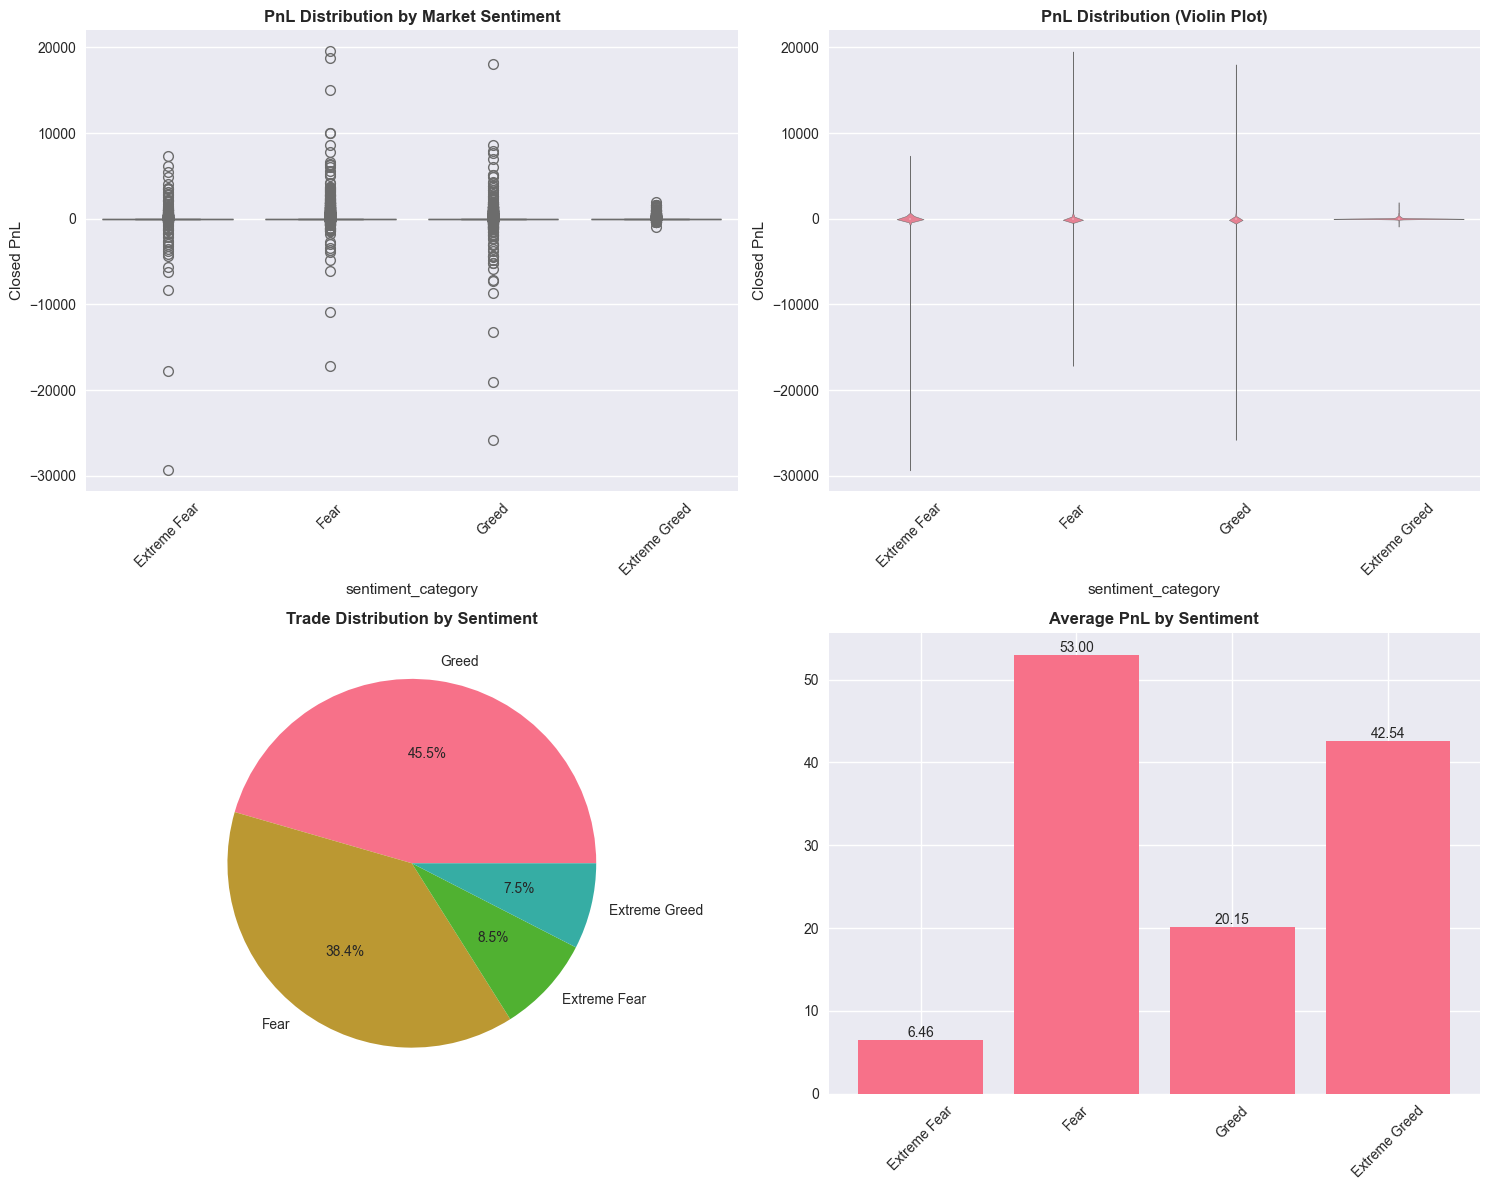

In [54]:
##  Basic Distribution Plots
# Create basic distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. PnL Distribution by Sentiment (Box Plot)
sns.boxplot(data=merged_data, x='sentiment_category', y='Closed PnL', ax=axes[0,0])
axes[0,0].set_title('PnL Distribution by Market Sentiment', fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)
# 2. PnL Distribution (Violin Plot)
sns.violinplot(data=merged_data, x='sentiment_category', y='Closed PnL', cut=0, ax=axes[0,1])
axes[0,1].set_title('PnL Distribution (Violin Plot)', fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
# 3. Trade Count by Sentiment
sentiment_counts = merged_data['sentiment_category'].value_counts()
axes[1,0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
axes[1,0].set_title('Trade Distribution by Sentiment', fontweight='bold')

# 4. Average PnL by Sentiment
avg_pnl = merged_data.groupby('sentiment_category')['Closed PnL'].mean()
bars = axes[1,1].bar(avg_pnl.index, avg_pnl.values)
axes[1,1].set_title('Average PnL by Sentiment', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

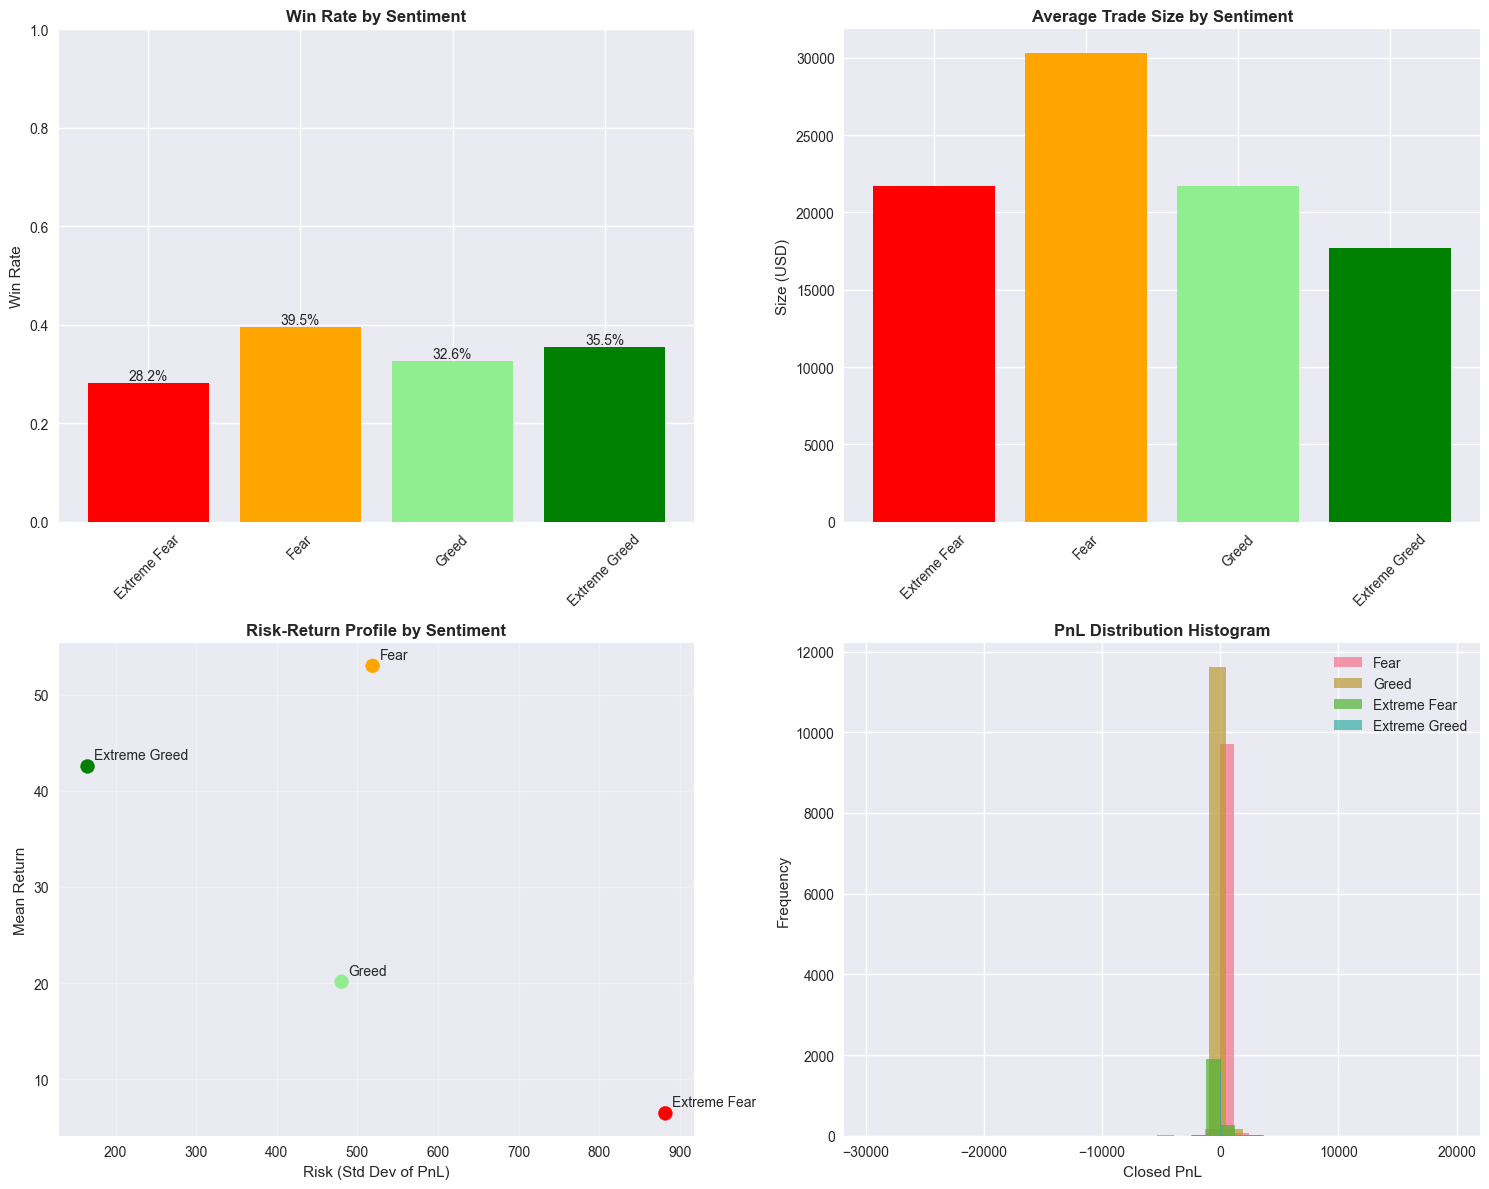

In [55]:
## Performance Metrics Visualization
# Performance metrics visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Win Rate by Sentiment
win_rates = merged_data.groupby('sentiment_category')['is_profitable'].mean()
bars = axes[0,0].bar(win_rates.index, win_rates.values, color=['red', 'orange', 'lightgreen', 'green'])
axes[0,0].set_title('Win Rate by Sentiment', fontweight='bold')
axes[0,0].set_ylabel('Win Rate')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_ylim(0, 1)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1%}', ha='center', va='bottom')

# 2. Average Trade Size by Sentiment
avg_size = merged_data.groupby('sentiment_category')['Size USD'].mean()
axes[0,1].bar(avg_size.index, avg_size.values, color=['red', 'orange', 'lightgreen', 'green'])
axes[0,1].set_title('Average Trade Size by Sentiment', fontweight='bold')
axes[0,1].set_ylabel('Size (USD)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Risk-Return Scatter
risk_return = merged_data.groupby('sentiment_category').agg({
    'Closed PnL': ['mean', 'std']
}).round(4)
risk_return.columns = ['Mean_Return', 'Risk_StdDev']
risk_return = risk_return.reset_index()

scatter = axes[1,0].scatter(risk_return['Risk_StdDev'], risk_return['Mean_Return'], 
                           s=100, c=['red', 'orange', 'lightgreen', 'green'])
for i, txt in enumerate(risk_return['sentiment_category']):
    axes[1,0].annotate(txt, (risk_return['Risk_StdDev'].iloc[i], risk_return['Mean_Return'].iloc[i]),
                       xytext=(5, 5), textcoords='offset points')
axes[1,0].set_title('Risk-Return Profile by Sentiment', fontweight='bold')
axes[1,0].set_xlabel('Risk (Std Dev of PnL)')
axes[1,0].set_ylabel('Mean Return')
axes[1,0].grid(True, alpha=0.3)

# 4. PnL Distribution Histogram
for sentiment in merged_data['sentiment_category'].unique():
    if pd.notna(sentiment):
        sentiment_pnl = merged_data[merged_data['sentiment_category'] == sentiment]['Closed PnL']
        axes[1,1].hist(sentiment_pnl, alpha=0.7, label=sentiment, bins=30)
axes[1,1].set_title('PnL Distribution Histogram', fontweight='bold')
axes[1,1].set_xlabel('Closed PnL')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()

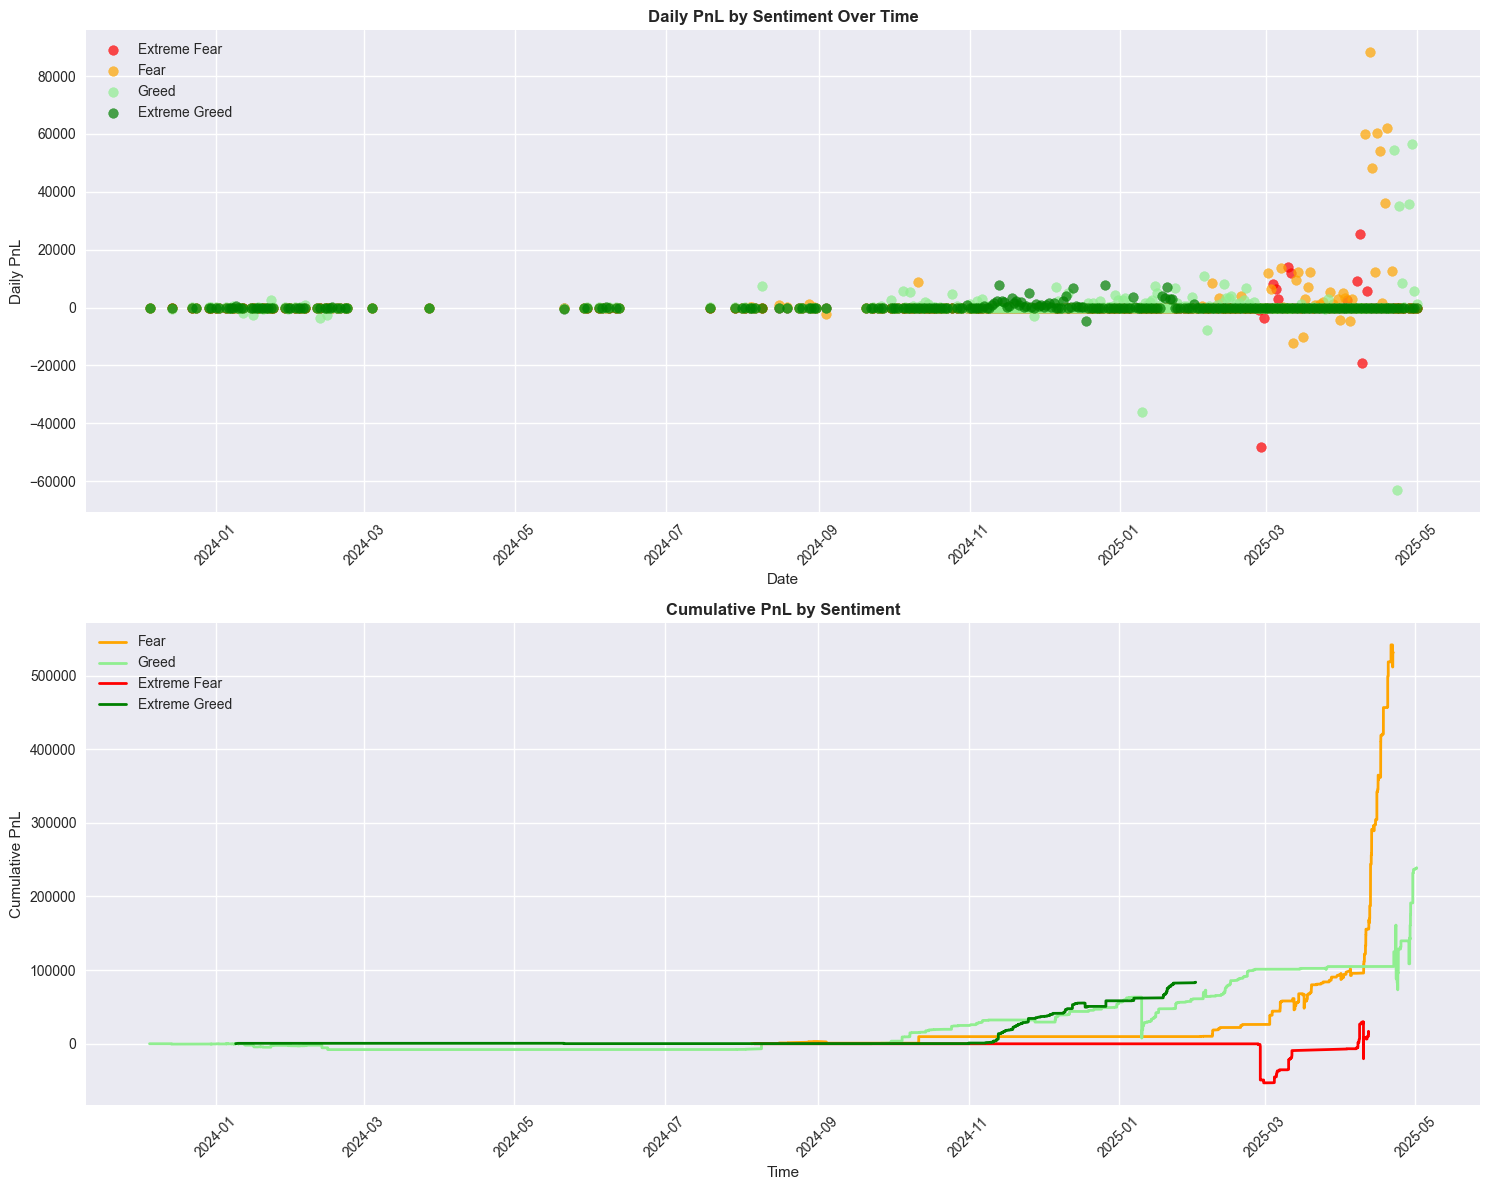

In [56]:
##  Time Series Analysis

# Time series analysis
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# 1. Daily PnL by Sentiment Over Time
daily_pnl = merged_data.groupby(['date', 'sentiment_category'])['Closed PnL'].sum().reset_index()
colors = {'Extreme Fear': 'red', 'Fear': 'orange', 'Greed': 'lightgreen', 'Extreme Greed': 'green'}

for sentiment in daily_pnl['sentiment_category'].unique():
    if pd.notna(sentiment):
        data = daily_pnl[daily_pnl['sentiment_category'] == sentiment]
        axes[0].scatter(data['date'], data['Closed PnL'], 
                       label=sentiment, alpha=0.7, c=colors.get(sentiment, 'blue'))

axes[0].set_title('Daily PnL by Sentiment Over Time', fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily PnL')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# 2. Cumulative PnL by Sentiment
for sentiment in merged_data['sentiment_category'].unique():
    if pd.notna(sentiment):
        sentiment_data = merged_data[merged_data['sentiment_category'] == sentiment].sort_values('Timestamp IST')
        cumulative_pnl = sentiment_data['Closed PnL'].cumsum()
        axes[1].plot(sentiment_data['Timestamp IST'], cumulative_pnl, 
                    label=sentiment, linewidth=2, color=colors.get(sentiment, 'blue'))

axes[1].set_title('Cumulative PnL by Sentiment', fontweight='bold')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Cumulative PnL')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


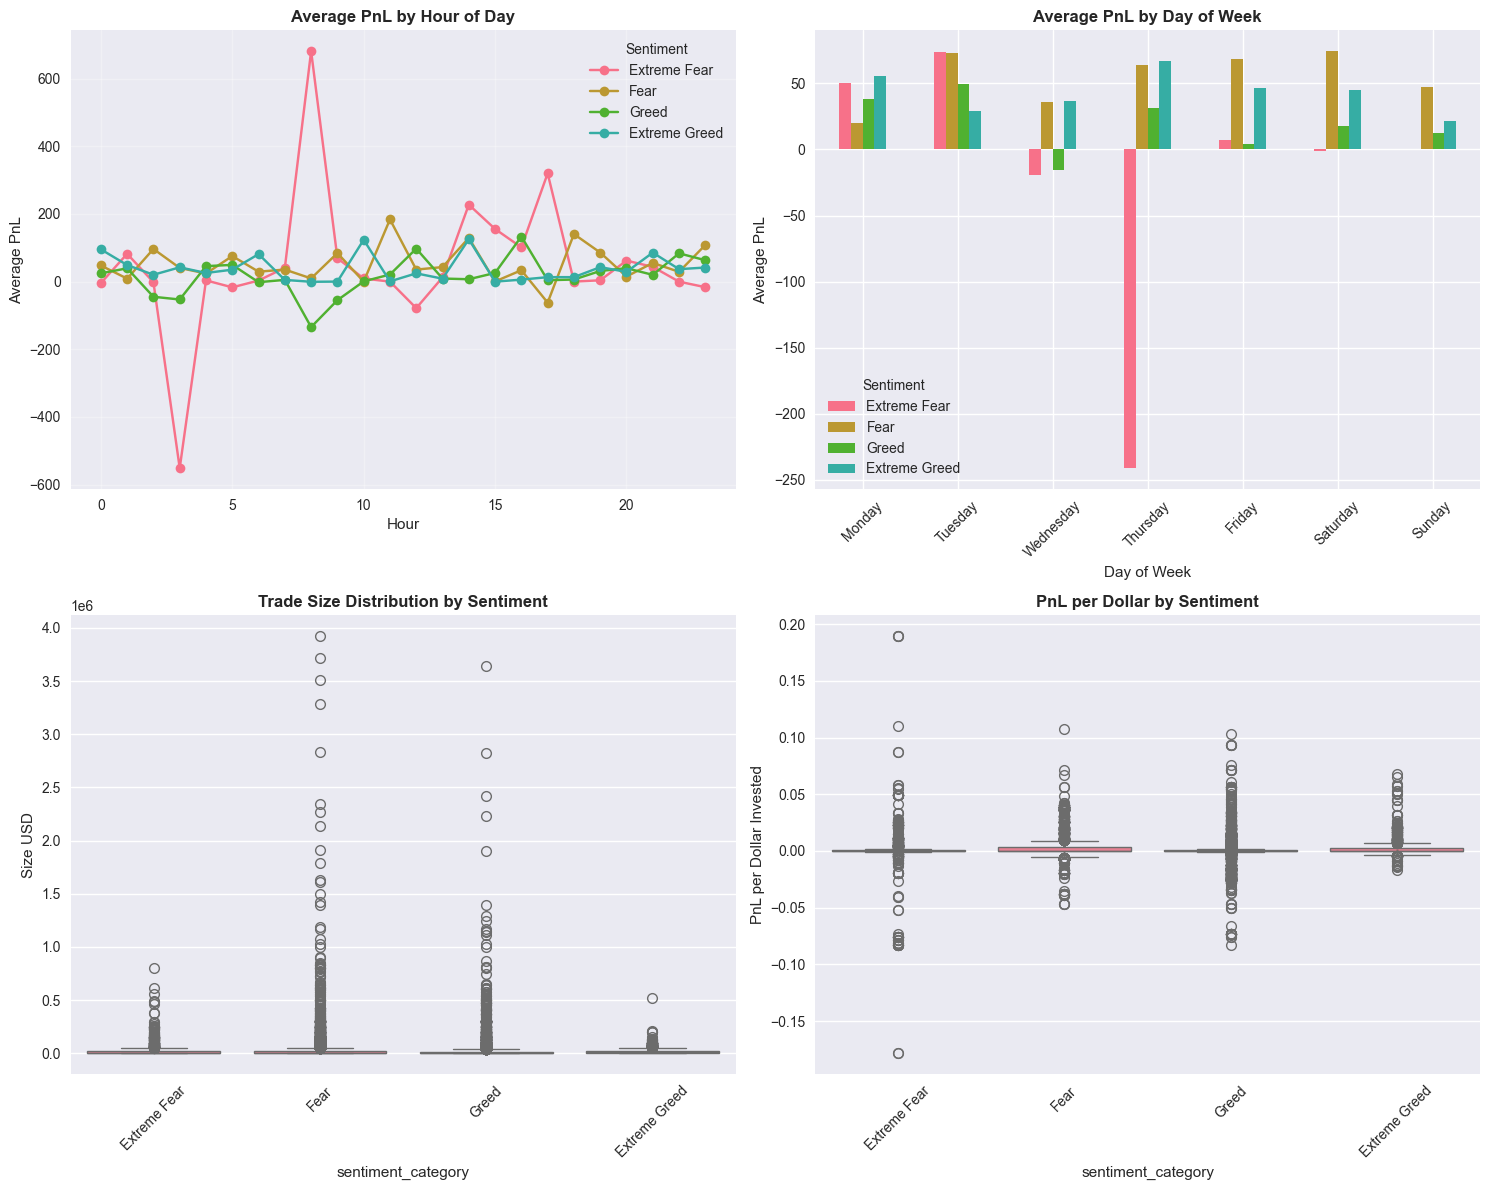

In [57]:
##  Advanced Analysis - Time-based Patterns
# Time-based pattern analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. PnL by Hour of Day
hourly_pnl = merged_data.groupby(['hour', 'sentiment_category'])['Closed PnL'].mean().reset_index()
pivot_hourly = hourly_pnl.pivot(index='hour', columns='sentiment_category', values='Closed PnL')
pivot_hourly.plot(kind='line', ax=axes[0,0], marker='o')
axes[0,0].set_title('Average PnL by Hour of Day', fontweight='bold')
axes[0,0].set_xlabel('Hour')
axes[0,0].set_ylabel('Average PnL')
axes[0,0].legend(title='Sentiment')
axes[0,0].grid(True, alpha=0.3)

# 2. PnL by Day of Week
dow_pnl = merged_data.groupby(['day_of_week', 'sentiment_category'])['Closed PnL'].mean().reset_index()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_pnl['day_of_week'] = pd.Categorical(dow_pnl['day_of_week'], categories=dow_order, ordered=True)
pivot_dow = dow_pnl.pivot(index='day_of_week', columns='sentiment_category', values='Closed PnL')
pivot_dow.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Average PnL by Day of Week', fontweight='bold')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Average PnL')
axes[0,1].legend(title='Sentiment')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Trade Size Distribution by Sentiment
sns.boxplot(data=merged_data, x='sentiment_category', y='Size USD', ax=axes[1,0])
axes[1,0].set_title('Trade Size Distribution by Sentiment', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. PnL per Dollar by Sentiment
sns.boxplot(data=merged_data, x='sentiment_category', y='pnl_per_dollar', ax=axes[1,1])
axes[1,1].set_title('PnL per Dollar by Sentiment', fontweight='bold')
axes[1,1].set_ylabel('PnL per Dollar Invested')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [58]:
## Generate Key Insights

print("="*60)
print("KEY INSIGHTS AND FINDINGS")
print("="*60)

# Calculate key metrics
print("KEY FINDINGS:")
print("-" * 40)

# Find best and worst performing sentiment
avg_pnl_by_sentiment = merged_data.groupby('sentiment_category')['Closed PnL'].mean()
best_sentiment = avg_pnl_by_sentiment.idxmax()
worst_sentiment = avg_pnl_by_sentiment.idxmin()

print(f"1. BEST PERFORMING SENTIMENT: {best_sentiment}")
print(f"   - Average PnL: ${avg_pnl_by_sentiment[best_sentiment]:.2f}")

print(f"\n2. WORST PERFORMING SENTIMENT: {worst_sentiment}")
print(f"   - Average PnL: ${avg_pnl_by_sentiment[worst_sentiment]:.2f}")

# Win rate analysis
win_rates = merged_data.groupby('sentiment_category')['is_profitable'].mean()
best_win_rate = win_rates.idxmax()
worst_win_rate = win_rates.idxmin()

print(f"\n3. HIGHEST WIN RATE: {best_win_rate} ({win_rates[best_win_rate]:.1%})")
print(f"   LOWEST WIN RATE: {worst_win_rate} ({win_rates[worst_win_rate]:.1%})")

# Trade volume analysis
trade_counts = merged_data['sentiment_category'].value_counts()
most_active = trade_counts.idxmax()
least_active = trade_counts.idxmin()

print(f"\n4. MOST ACTIVE TRADING SENTIMENT: {most_active} ({trade_counts[most_active]} trades)")
print(f"   LEAST ACTIVE TRADING SENTIMENT: {least_active} ({trade_counts[least_active]} trades)")

# Risk analysis
risk_by_sentiment = merged_data.groupby('sentiment_category')['Closed PnL'].std()
lowest_risk = risk_by_sentiment.idxmin()
highest_risk = risk_by_sentiment.idxmax()

print(f"\n5. LOWEST RISK SENTIMENT: {lowest_risk} (Std Dev: ${risk_by_sentiment[lowest_risk]:.2f})")
print(f"   HIGHEST RISK SENTIMENT: {highest_risk} (Std Dev: ${risk_by_sentiment[highest_risk]:.2f})")

# Calculate Sharpe-like ratio (return/risk)
sharpe_ratio = avg_pnl_by_sentiment / risk_by_sentiment
best_sharpe = sharpe_ratio.idxmax()

print(f"\n6. BEST RISK-ADJUSTED RETURNS: {best_sharpe} (Ratio: {sharpe_ratio[best_sharpe]:.3f})")

KEY INSIGHTS AND FINDINGS
KEY FINDINGS:
----------------------------------------
1. BEST PERFORMING SENTIMENT: Fear
   - Average PnL: $53.00

2. WORST PERFORMING SENTIMENT: Extreme Fear
   - Average PnL: $6.46

3. HIGHEST WIN RATE: Fear (39.5%)
   LOWEST WIN RATE: Extreme Fear (28.2%)

4. MOST ACTIVE TRADING SENTIMENT: Greed (11864 trades)
   LEAST ACTIVE TRADING SENTIMENT: Extreme Greed (1965 trades)

5. LOWEST RISK SENTIMENT: Extreme Greed (Std Dev: $165.12)
   HIGHEST RISK SENTIMENT: Extreme Fear (Std Dev: $882.21)

6. BEST RISK-ADJUSTED RETURNS: Extreme Greed (Ratio: 0.258)


In [59]:
## Cell 19: Trading Strategy Recommendations
print("="*60)
print("TRADING STRATEGY RECOMMENDATIONS")
print("="*60)

print("1. SENTIMENT-BASED POSITION SIZING:")
avg_sizes = merged_data.groupby('sentiment_category')['Size USD'].mean()
for sentiment in avg_sizes.index:
    print(f"   - {sentiment}: Average size ${avg_sizes[sentiment]:.2f}")

print(f"\n2. OPTIMAL TRADING CONDITIONS:")
print(f"   - Focus on {best_sentiment} periods for higher returns")
print(f"   - Exercise caution during {worst_sentiment} periods")
print(f"   - {best_win_rate} offers the highest probability of success")

print(f"\n3. RISK MANAGEMENT:")
print(f"   - Consider smaller position sizes during {highest_risk} periods")
print(f"   - {lowest_risk} periods offer more predictable outcomes")
print(f"   - Best risk-adjusted strategy: focus on {best_sharpe} conditions")

# Advanced recommendations
median_pnl = merged_data.groupby('sentiment_category')['Closed PnL'].median()
print(f"\n4. ADVANCED INSIGHTS:")
for sentiment in merged_data['sentiment_category'].unique():
    if pd.notna(sentiment):
        sentiment_data = merged_data[merged_data['sentiment_category'] == sentiment]
        profitable_trades = sentiment_data[sentiment_data['Closed PnL'] > 0]
        losing_trades = sentiment_data[sentiment_data['Closed PnL'] < 0]
        
        if len(profitable_trades) > 0 and len(losing_trades) > 0:
            avg_win = profitable_trades['Closed PnL'].mean()
            avg_loss = losing_trades['Closed PnL'].mean()
            win_loss_ratio = abs(avg_win / avg_loss)
            
            print(f"   - {sentiment}: Win/Loss Ratio = {win_loss_ratio:.2f}")

print(f"\n5. TIMING RECOMMENDATIONS:")
# Find best hours and days
best_hour = merged_data.groupby('hour')['Closed PnL'].mean().idxmax()
best_day = merged_data.groupby('day_of_week')['Closed PnL'].mean().idxmax()

print(f"   - Best trading hour: {best_hour}:00")
print(f"   - Best trading day: {best_day}")


TRADING STRATEGY RECOMMENDATIONS
1. SENTIMENT-BASED POSITION SIZING:
   - Extreme Fear: Average size $21736.56
   - Fear: Average size $30321.45
   - Greed: Average size $21703.97
   - Extreme Greed: Average size $17694.04

2. OPTIMAL TRADING CONDITIONS:
   - Focus on Fear periods for higher returns
   - Exercise caution during Extreme Fear periods
   - Fear offers the highest probability of success

3. RISK MANAGEMENT:
   - Consider smaller position sizes during Extreme Fear periods
   - Extreme Greed periods offer more predictable outcomes
   - Best risk-adjusted strategy: focus on Extreme Greed conditions

4. ADVANCED INSIGHTS:
   - Fear: Win/Loss Ratio = 0.73
   - Greed: Win/Loss Ratio = 0.62
   - Extreme Fear: Win/Loss Ratio = 0.32
   - Extreme Greed: Win/Loss Ratio = 1.57

5. TIMING RECOMMENDATIONS:
   - Best trading hour: 11:00
   - Best trading day: Tuesday


In [60]:
## Cell 20: Export Results and Summary
# Save processed data
merged_data.to_csv('processed_trader_sentiment_data.csv', index=False)
daily_stats.to_csv('daily_sentiment_stats.csv', index=False)

# Create summary report
summary_report = {
    'Total_Trades': len(merged_data),
    'Date_Range': f"{merged_data['date'].min()} to {merged_data['date'].max()}",
    'Best_Sentiment': best_sentiment,
    'Best_Avg_PnL': avg_pnl_by_sentiment[best_sentiment],
    'Worst_Sentiment': worst_sentiment,
    'Worst_Avg_PnL': avg_pnl_by_sentiment[worst_sentiment],
    'Highest_Win_Rate_Sentiment': best_win_rate,
    'Highest_Win_Rate': win_rates[best_win_rate],
    'Best_Risk_Adjusted_Sentiment': best_sharpe,
    'Best_Sharpe_Ratio': sharpe_ratio[best_sharpe]
}

summary_df = pd.DataFrame([summary_report])
summary_df.to_csv('analysis_summary.csv', index=False)

print("="*60)
print("ANALYSIS COMPLETE")
print("="*60)
print(f"Files saved:")
print(f"- processed_trader_sentiment_data.csv")
print(f"- daily_sentiment_stats.csv") 
print(f"- analysis_summary.csv")

print(f"\nFinal Summary:")
display(summary_df)

print(f"\nTotal trades analyzed: {len(merged_data):,}")
print(f"Date range: {merged_data['date'].min()} to {merged_data['date'].max()}")
print(f"Analysis completed successfully!")

ANALYSIS COMPLETE
Files saved:
- processed_trader_sentiment_data.csv
- daily_sentiment_stats.csv
- analysis_summary.csv

Final Summary:


,Total_Trades,Date_Range,Best_Sentiment,Best_Avg_PnL,Worst_Sentiment,Worst_Avg_PnL,Highest_Win_Rate_Sentiment,Highest_Win_Rate,Best_Risk_Adjusted_Sentiment,Best_Sharpe_Ratio
0,26064,2023-12-05 to 2025-05-01,Fear,53.004862,Extreme Fear,6.456574,Fear,0.39491,Extreme Greed,0.257645



Total trades analyzed: 26,064
Date range: 2023-12-05 to 2025-05-01
Analysis completed successfully!
